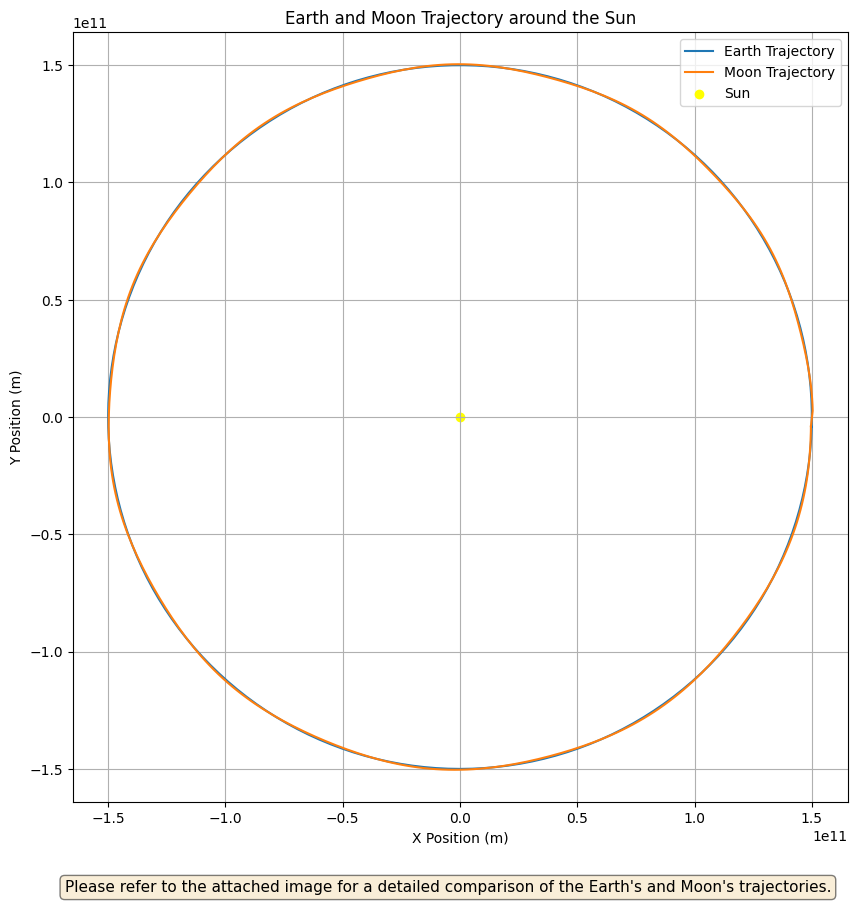

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.6743e-11   # Gravitational constant (Nm^2/kg^2)
M_s = 1.989e30   # Mass of the Sun (kg)
M_z = 5.972e24   # Mass of the Earth (kg)
M_k = 7.347e22   # Mass of the Moon (kg)
R_zs = 1.5e11    # Earth-Sun distance (m)
R_zk = 384400e3  # Earth-Moon distance (m)

# Time parameters
dt = 24 * 3600   # time step (1 day in seconds)
duration = 365 * dt  # 1 year

# Initial conditions for Earth and Moon
# Earth
v_e = np.sqrt(G * M_s / R_zs)  # Earth's velocity magnitude in its orbit around the Sun
earth_pos = np.array([R_zs, 0])  # Initial position (x, y)
earth_vel = np.array([0, v_e])  # Initial velocity (vx, vy)

# Moon
v_m = np.sqrt(G * M_z / R_zk)  # Moon's velocity magnitude in its orbit around the Earth
moon_pos = earth_pos + np.array([R_zk, 0])  # Initial position (x, y)
moon_vel = earth_vel + np.array([0, v_m])  # Initial velocity (vx, vy) relative to Earth's velocity


def gravitational_force(m1, m2, pos1, pos2):
    # Calculate the gravitational force between two bodies using Newton's law of universal gravitation
    distance_vector = pos2 - pos1
    distance = np.linalg.norm(distance_vector)  # Normalize the vector to get the direction of the force
    force_magnitude = G * m1 * m2 / distance**2
    force_direction = distance_vector / distance
    return force_magnitude * force_direction


def midpoint_method(earth_pos, earth_vel, moon_pos, moon_vel, dt, duration):
    # Store the simulation results
    earth_trajectory = [earth_pos]
    moon_trajectory = [moon_pos]

    time = 0
    while time < duration:
        # Forces acting on Earth and Moon
        force_on_earth = gravitational_force(M_z, M_s, earth_pos, np.array([0, 0]))
        force_on_moon = gravitational_force(M_k, M_z, moon_pos, earth_pos) + gravitational_force(M_k, M_s, moon_pos, np.array([0, 0]))

        # Initial Euler step to estimate midpoint velocity
        mid_earth_vel = earth_vel + force_on_earth / M_z * dt / 2
        mid_moon_vel = moon_vel + force_on_moon / M_k * dt / 2

        # Midpoint positions
        mid_earth_pos = earth_pos + mid_earth_vel * dt / 2
        mid_moon_pos = moon_pos + mid_moon_vel * dt / 2

        # Recalculate forces at midpoint
        mid_force_on_earth = gravitational_force(M_z, M_s, mid_earth_pos, np.array([0, 0]))
        mid_force_on_moon = gravitational_force(M_k, M_z, mid_moon_pos, mid_earth_pos) + gravitational_force(M_k, M_s, mid_moon_pos, np.array([0, 0]))

        # Update velocities and positions using midpoint values
        earth_vel += mid_force_on_earth / M_z * dt
        moon_vel += mid_force_on_moon / M_k * dt
        earth_pos += mid_earth_vel * dt
        moon_pos += mid_moon_vel * dt

        earth_trajectory.append(earth_pos.copy())
        moon_trajectory.append(moon_pos.copy())

        time += dt

    return earth_trajectory, moon_trajectory


# Run the simulation
earth_trajectory, moon_trajectory = midpoint_method(earth_pos, earth_vel, moon_pos, moon_vel, dt, duration)

# Convert to arrays for plotting
earth_trajectory = np.array(earth_trajectory)
moon_trajectory = np.array(moon_trajectory)

# Plot Earth and Moon trajectories
plt.figure(figsize=(10, 10))
plt.plot(earth_trajectory[:, 0], earth_trajectory[:, 1], label='Earth Trajectory')
plt.plot(moon_trajectory[:, 0], moon_trajectory[:, 1], label='Moon Trajectory')
plt.scatter([0], [0], color='yellow', label='Sun')  # Sun's position
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.title('Earth and Moon Trajectory around the Sun')
plt.legend()
plt.grid(True)
plt.axis('equal')  # To maintain aspect ratio
# Create a text box with a message
message = "Please refer to the attached image for a detailed comparison of the Earth's and Moon's trajectories."
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# Place the text box on the plot, adjust the coordinates as needed
plt.figtext(0.5, 0.02, message, ha="center", fontsize=11, bbox=props)
plt.show()